<a href="https://colab.research.google.com/github/wc9999/DWBI-ENJOY-/blob/main/dwbi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

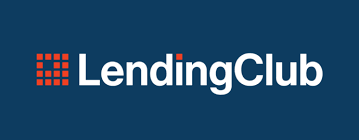

Industri : Layanan Keuangan Konsumen
Sektor : Keuangan
Lokasi : San Francisco
web : https://www.lendingclub.com/


# Preparation Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
loans = pd.read_csv('/gdrive/MyDrive/DWBI/loan_data.csv')

In [ ]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Exploratory Data Analysis

Text(0.5, 0, 'FICO')

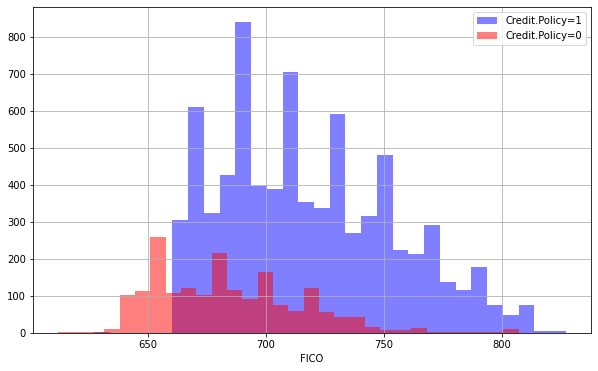

In [ ]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')
#menampilkan credit policy dengan kolom fico

Text(0.5, 0, 'FICO')

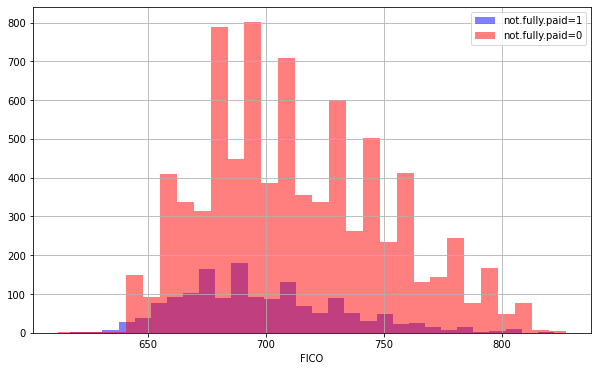

In [ ]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')
#menampilkan not.fully.paid dengan kolom fico

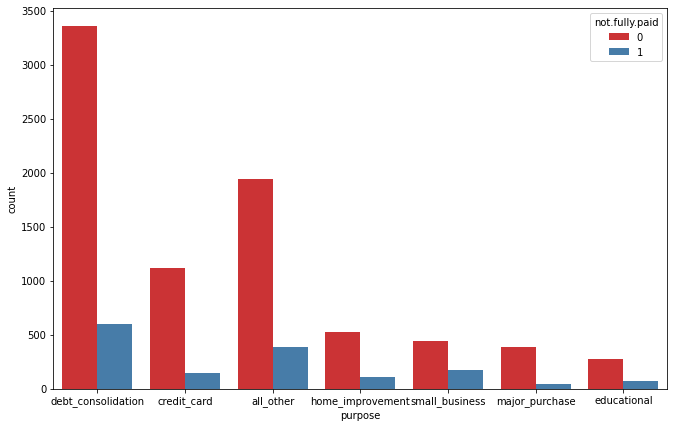

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')
#menampilkan not.fully.paid berdasarkan purpose

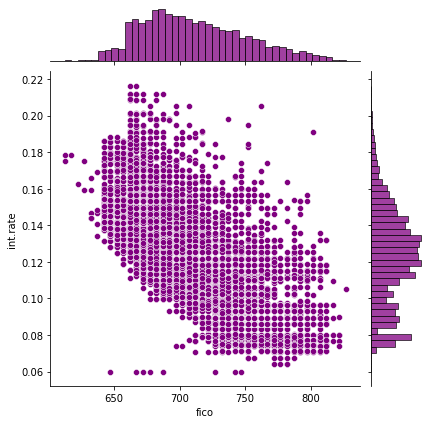

In [ ]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<Figure size 792x504 with 0 Axes>

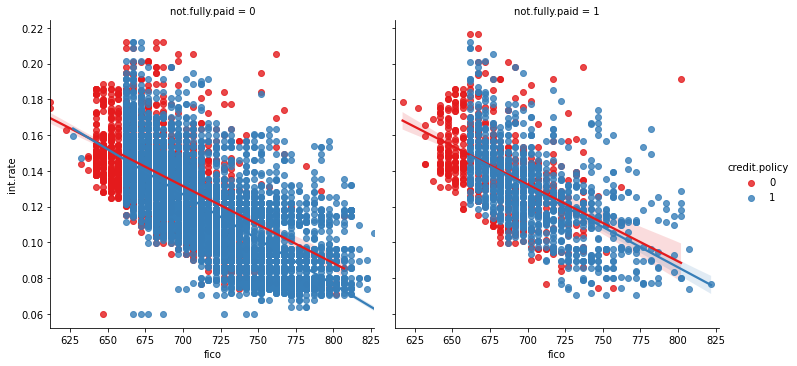

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

## Setting up the Data


In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

In [ ]:
cat_feats = ['purpose']

In [ ]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [ ]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0



## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
X1 = final_data.drop('not.fully.paid',axis=1)
y1 = final_data['not.fully.paid']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=101)

In [ ]:
X2 = final_data.drop('not.fully.paid',axis=1)
y2 = final_data['not.fully.paid']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.10, random_state=101)

## Training a Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtree.fit(X1_train,y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtree.fit(X2_train,y2_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
predictions1 = dtree.predict(X1_test)

In [ ]:
predictions2 = dtree.predict(X2_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

Berikut ada peramalan berdasarkan split test ration yg sudah ditentukan diantaranya 70:30, 80:20, 90:10 untuk menentukan split test indikator terbaik untuk permodelan decision tree ini

## 70 : 30

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2431
           1       0.70      0.76      0.73       443

    accuracy                           0.91      2874
   macro avg       0.83      0.85      0.84      2874
weighted avg       0.92      0.91      0.91      2874



In [ ]:
print(confusion_matrix(y_test,predictions))

[[2287  144]
 [ 105  338]]


## 80 : 20

In [ ]:
print(classification_report(y1_test,predictions1))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1623
           1       0.57      0.64      0.60       293

    accuracy                           0.87      1916
   macro avg       0.75      0.78      0.76      1916
weighted avg       0.88      0.87      0.87      1916



## 90 : 10

In [ ]:
print(classification_report(y2_test,predictions2))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       824
           1       0.17      0.22      0.19       134

    accuracy                           0.74       958
   macro avg       0.52      0.52      0.52       958
weighted avg       0.77      0.74      0.75       958



In [ ]:
from sklearn.metrics import accuracy_score 

In [ ]:
acc = []
x_axis_DT = range(3,12)
for i in range(3,12):
    DT = DecisionTreeClassifier(criterion = "gini",
                                random_state = 100,
                                max_depth=i, 
                                min_samples_leaf=5)
    DT.fit(X1_train,y1_train)
    y_pred = DT.predict(X1_test)
    accuracy = accuracy_score(y1_test,y_pred)*100
    acc.append(accuracy)
    print ("Accuracy for Decision for max depth ",i," is: ", accuracy) 

Accuracy for Decision for max depth  3  is:  84.70772442588726
Accuracy for Decision for max depth  4  is:  84.65553235908142
Accuracy for Decision for max depth  5  is:  84.34237995824635
Accuracy for Decision for max depth  6  is:  83.40292275574113
Accuracy for Decision for max depth  7  is:  83.55949895615866
Accuracy for Decision for max depth  8  is:  83.66388308977035
Accuracy for Decision for max depth  9  is:  82.93319415448852
Accuracy for Decision for max depth  10  is:  82.6722338204593
Accuracy for Decision for max depth  11  is:  82.77661795407099


In [ ]:
#berdasarkan pengolahan diatas maka dipilihlah ratio train test split dengan rasio 80:20 

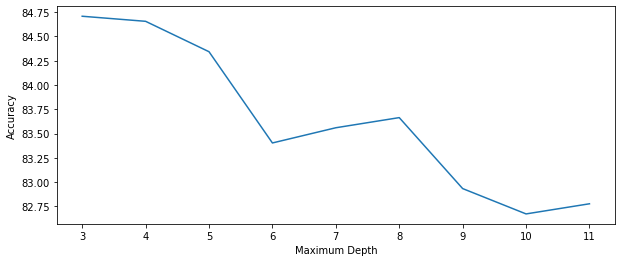

In [ ]:
plt.subplots(figsize = (10, 4))
plt.plot(x_axis_DT,acc)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.show()

## **Kesimpulan**

berdasarkan pengolahan diatas maka dipilihlah ratio train test split yaitu 80:20, setelah dilakukan uji akurasi didapat pada 0.86. dievaluasi lagi dengan max_depth (kedalaman uji) dengan nilai 3-11 didapatkan hasil terbaik pada nilai kedalam 3 dengan hasil 84.70772442588726. dengan begitu decision tree adalah algoritma yang tepat untuk menentukan customer yang layak menerima pinjaman pada lending club berdasarkan analisa yang sudah kami lakukan.